## **第6回レポート課題その2**

### 2.CBOWモデルの学習および評価

まず, 学習を実装した.

| epoch 1 |  iter 1 / 9295 | time 0[s] | loss 4.16
| epoch 1 |  iter 21 / 9295 | time 0[s] | loss 4.16
| epoch 1 |  iter 41 / 9295 | time 0[s] | loss 4.15
| epoch 1 |  iter 61 / 9295 | time 0[s] | loss 4.13
| epoch 1 |  iter 81 / 9295 | time 1[s] | loss 4.05
| epoch 1 |  iter 101 / 9295 | time 1[s] | loss 3.93
| epoch 1 |  iter 121 / 9295 | time 1[s] | loss 3.79
| epoch 1 |  iter 141 / 9295 | time 2[s] | loss 3.63
| epoch 1 |  iter 161 / 9295 | time 2[s] | loss 3.51
| epoch 1 |  iter 181 / 9295 | time 2[s] | loss 3.38
| epoch 1 |  iter 201 / 9295 | time 2[s] | loss 3.26
| epoch 1 |  iter 221 / 9295 | time 3[s] | loss 3.16
| epoch 1 |  iter 241 / 9295 | time 3[s] | loss 3.09
| epoch 1 |  iter 261 / 9295 | time 3[s] | loss 3.03
| epoch 1 |  iter 281 / 9295 | time 4[s] | loss 2.98
| epoch 1 |  iter 301 / 9295 | time 4[s] | loss 2.92
| epoch 1 |  iter 321 / 9295 | time 4[s] | loss 2.88
| epoch 1 |  iter 341 / 9295 | time 4[s] | loss 2.86
| epoch 1 |  iter 361 / 9295 | time 5[s] | loss 2.81

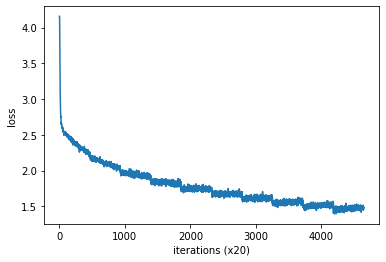

OSError: ignored

In [28]:
# coding: utf-8
import sys
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master')
from common import config
config.GPU = True
from common.np import *
import pickle
from common.trainer import Trainer
from common.optimizer import Adam
from cbow import CBOW
from skip_gram import SkipGram
from common.util import create_contexts_target, to_cpu, to_gpu
from dataset import ptb


# ハイパーパラメータの設定
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

# データの読み込み
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

contexts, target = create_contexts_target(corpus, window_size)
if config.GPU:
    contexts, target = to_gpu(contexts), to_gpu(target)

# モデル等の生成
model = CBOW(vocab_size, hidden_size, window_size, corpus)
# model = SkipGram(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# 学習開始
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

# 必要なデータを保存
word_vecs = model.word_vecs
if config.GPU:
    word_vecs = to_cpu(word_vecs)
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = 'cbow_params.pkl' 
with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master')
from common.util import most_similar, analogy
import pickle


pkl_file = '/content/drive/My Drive/deep-learning-from-scratch-2-master/ch04/cbow_params.pkl'

with open(pkl_file, 'rb') as f:
    params = pickle.load(f)
    word_vecs = params['word_vecs']
    word_to_id = params['word_to_id']
    id_to_word = params['id_to_word']

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


In [ ]:
[query] you
 we: 0.6103515625
 someone: 0.59130859375
 i: 0.55419921875
 something: 0.48974609375
 anyone: 0.47314453125

[query] year
 month: 0.71875
 week: 0.65234375
 spring: 0.62744140625
 summer: 0.6259765625
 decade: 0.603515625

[query] car
 luxury: 0.497314453125
 arabia: 0.47802734375
 auto: 0.47119140625
 disk-drive: 0.450927734375
 travel: 0.4091796875

[query] toyota
 ford: 0.55078125
 instrumentation: 0.509765625
 mazda: 0.49365234375
 bethlehem: 0.47509765625
 nissan: 0.474853515625

他のクエリでも同様に実行した.

In [ ]:
querys = ['in', 'what', 'day', 'computer']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

In [ ]:
[query] in
 eurodollars: 0.441162109375
 since: 0.35009765625
 during: 0.347900390625
 across: 0.341064453125
 draws: 0.339599609375

[query] what
 why: 0.517578125
 something: 0.495361328125
 anybody: 0.49169921875
 someone: 0.4853515625
 dislike: 0.443115234375

[query] day
 minute: 0.55224609375
 hour: 0.489501953125
 minutes: 0.488037109375
 furor: 0.4716796875
 lufkin: 0.466796875

[query] computer
 software: 0.53466796875
 mainframe: 0.53173828125
 computers: 0.52783203125
 disk: 0.51611328125
 systems: 0.5078125

類推問題についても実行してみた.

In [ ]:
analogy('king', 'man', 'queen',  word_to_id, id_to_word, word_vecs)
analogy('take', 'took', 'go',  word_to_id, id_to_word, word_vecs)
analogy('car', 'cars', 'child',  word_to_id, id_to_word, word_vecs)
analogy('good', 'better', 'bad',  word_to_id, id_to_word, word_vecs)

In [ ]:
[analogy] king:man = queen:?
 woman: 5.16015625
 veto: 4.9296875
 ounce: 4.69140625
 earthquake: 4.6328125
 successor: 4.609375

[analogy] take:took = go:?
 went: 4.55078125
 points: 4.25
 began: 4.09375
 comes: 3.98046875
 oct.: 3.90625

[analogy] car:cars = child:?
 children: 5.21875
 average: 4.7265625
 yield: 4.20703125
 cattle: 4.1875
 priced: 4.1796875

[analogy] good:better = bad:?
 more: 6.6484375
 less: 6.0625
 rather: 5.21875
 slower: 4.734375
 greater: 4.671875

### 感想
4章の内容は後半が理解するのが難しかったが, word2vecに関しては概ね分かった. 今回の評価は使ったクエリにもよるだろうが, 同じ品詞や関連ワードが確認できた. 一方類推問題は例以外にはあまり良い例が考えられなかったので次回までに調べておきたい.

### 参考文献
斎藤 康毅　『ゼロから作るDeep Learning②自然言語処理編』, 2018, オライリー・ジャパン, p.93-174